## Prepare data

Origin data [here](https://blog.keras.io/building-autoencoders-in-keras.html)

In [2]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


# Simple AutoEncoder

## Prepare a simple model as encoder and decoder

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

## Train de AutoEncoder

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

235/235 [==============================] - 1s 4ms/step - loss: 0.0935 - val_loss: 0.0921
Epoch 21/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0934 - val_loss: 0.0921
Epoch 22/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0933 - val_loss: 0.0920
Epoch 23/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0933 - val_loss: 0.0920
Epoch 24/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0932 - val_loss: 0.0919
Epoch 25/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0932 - val_loss: 0.0920
Epoch 26/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0931 - val_loss: 0.0919
Epoch 27/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0931 - val_loss: 0.0918
Epoch 28/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0931 - val_loss: 0.0918
Epoch 29/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0930 - val_loss: 0.0918
Ep

## Model Image Reconstruction

313/313 [==============================] - 0s 1ms/step


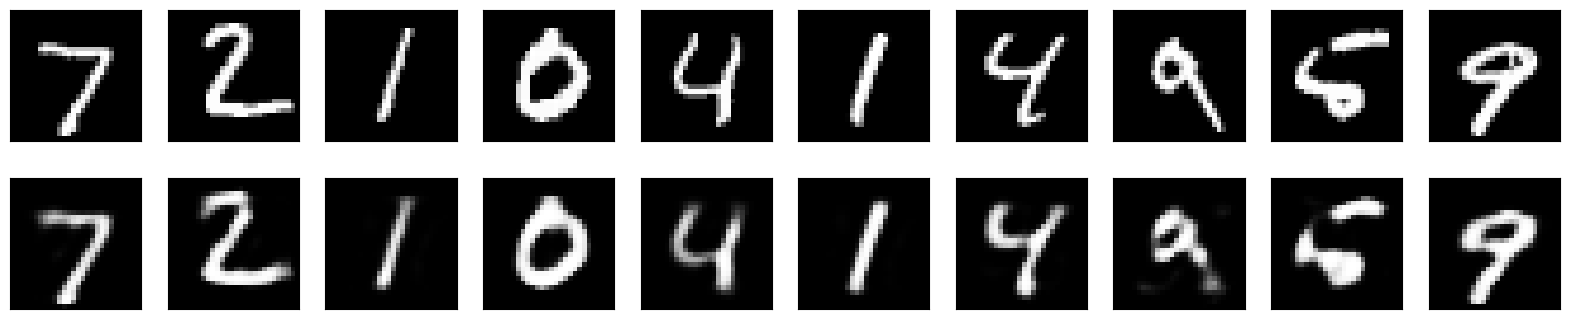

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional autoencoder

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

## Prepare Data

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


## Train

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 15s 9ms/step - loss: 0.2210 - val_loss: 0.1525
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1404 - val_loss: 0.1305
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1261 - val_loss: 0.1209
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1190 - val_loss: 0.1152
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1146 - val_loss: 0.1118
Epoch 6/50
469/469 [==============================] - 4s 7ms/step - loss: 0.1116 - val_loss: 0.1097
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1093 - val_loss: 0.1072
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1075 - val_loss: 0.1059
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1059 - val_loss: 0.1040
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1047 - val_loss: 0.103

## Image Generation

313/313 [==============================] - 1s 3ms/step


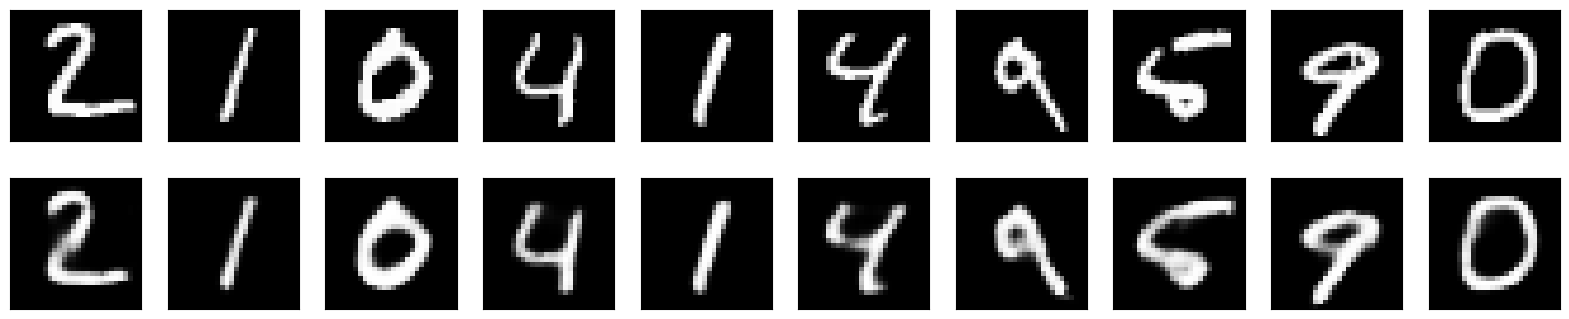

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# VAE

In [3]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [4]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [5]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [6]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=30,
        batch_size=32,
        verbose=2,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 15s 5ms/step - loss: 185.7756 - val_loss: 167.0582
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 164.6785 - val_loss: 163.2331
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 161.6329 - val_loss: 160.8502
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 159.6078 - val_loss: 159.1676
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 157.9667 - val_loss: 157.5939
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 156.6004 - val_loss: 156.3280
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 155.5316 - val_loss: 155.6666
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 154.6822 - val_loss: 154.8770
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 153.9896 - val_loss: 154.0462
Epoch 10/100
1875/1875 [============

625/625 [==============================] - 1s 1ms/step


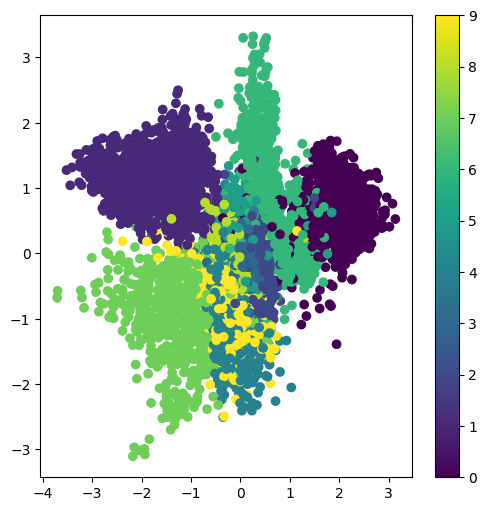

In [16]:
batch_size = 16
x_test_encoded = np.array(encoder.predict(x_test, batch_size=batch_size))
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0,:, 0], x_test_encoded[0,:, 1], c=y_test)
plt.colorbar()
plt.show()

1/1 [==============================] - 0s 18ms/step


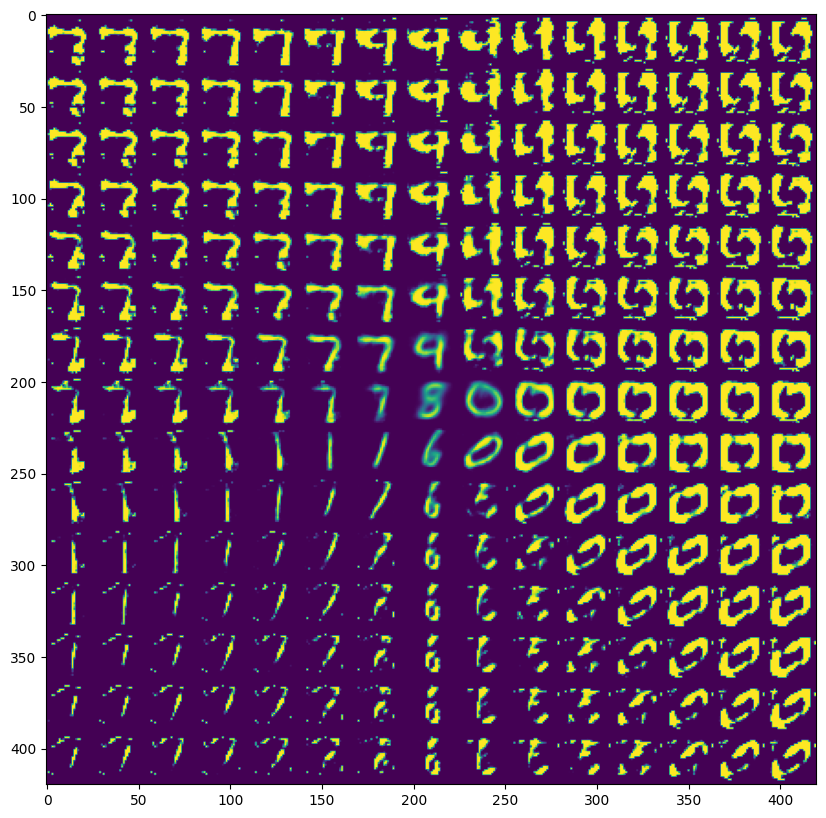

In [17]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample, verbose=0)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()